<a href="https://colab.research.google.com/github/felixlys/forecast_with_StochProcess/blob/main/Forecast_ByKevin_T_Anggatama_ARIMA_implemented_in_INDF_JK_for_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
install.packages("quantmod")
library(quantmod)
indf_data<-getSymbols(Symbols="INDF.JK",src="yahoo",from=Sys.Date()-1953,to=Sys.Date(),auto.assign=FALSE)
head(indf_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



           INDF.JK.Open INDF.JK.High INDF.JK.Low INDF.JK.Close INDF.JK.Volume
2019-06-28         7000         7100        7000          7025        4512100
2019-07-01         7025         7075        7000          7075        3767400
2019-07-02         7100         7150        7050          7125        6254100
2019-07-03         7150         7150        6950          7100        4854700
2019-07-04         7100         7100        7000          7050        1376400
2019-07-05         7025         7075        6925          7000        3080800
           INDF.JK.Adjusted
2019-06-28         5715.181
2019-07-01         5755.858
2019-07-02         5796.536
2019-07-03         5776.196
2019-07-04         5735.519
2019-07-05         5694.842

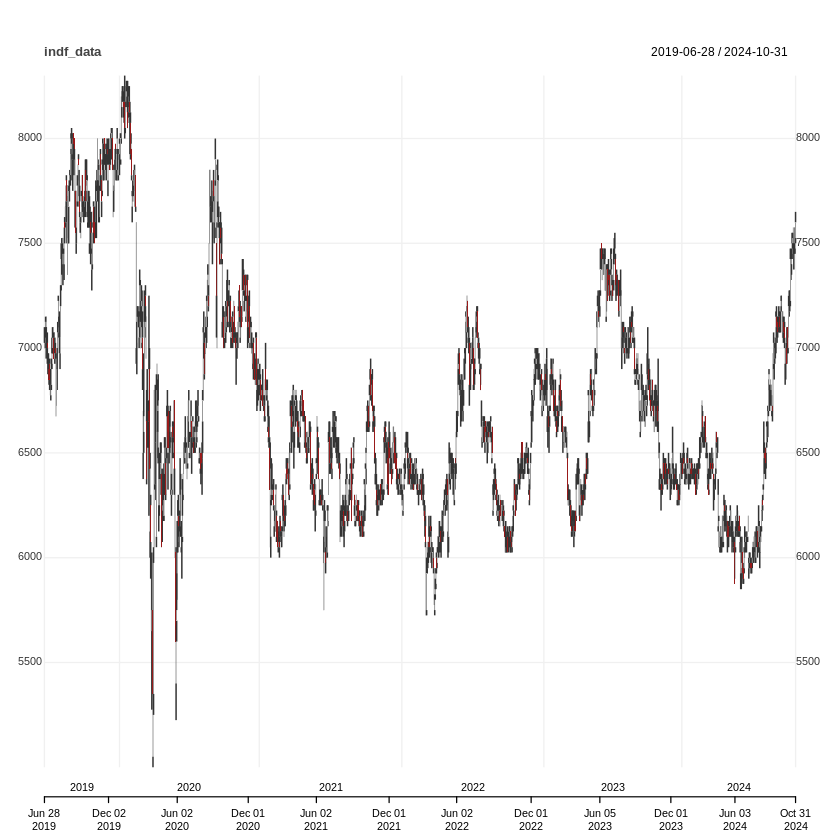

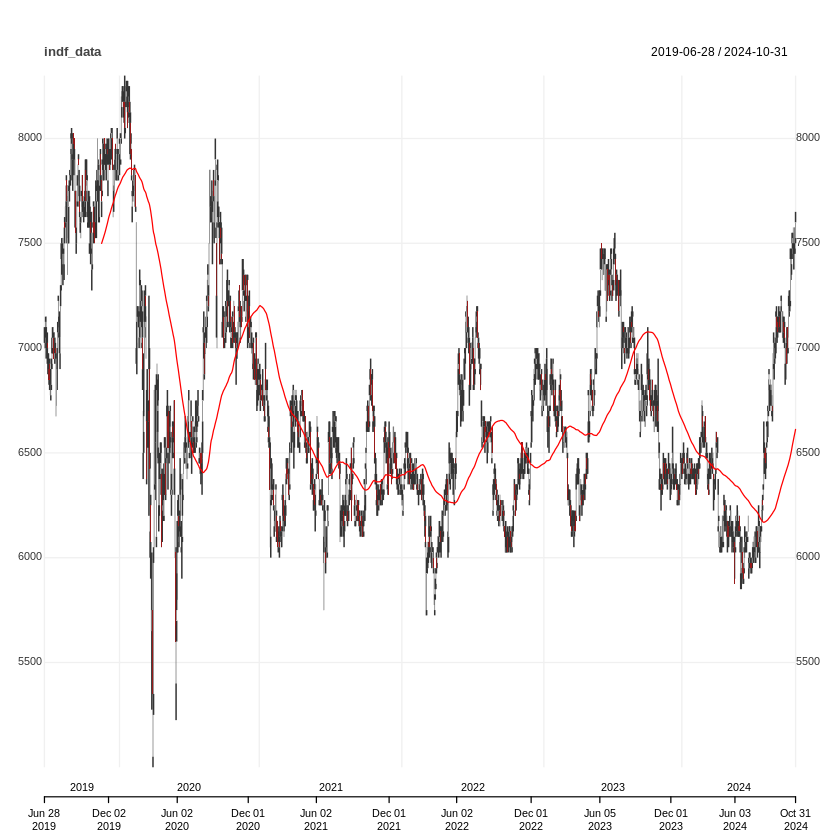

In [34]:
chart_Series(indf_data,col="black")
add_SMA(n=100,on=1,col="red")#SIMPLE MOVING AVERAGE UTK 100 HARI
#adalah indikator teknikal yang menghitung rata-rata harga saham selama sejumlah periode tertentu untuk mengidentifikasi tren.


In [35]:
indf_data<-Cl(indf_data)
head(indf_data)

           INDF.JK.Close
2019-06-28          7025
2019-07-01          7075
2019-07-02          7125
2019-07-03          7100
2019-07-04          7050
2019-07-05          7000

           INDF.JK.Close
2019-06-28      8.857230
2019-07-01      8.864323
2019-07-02      8.871365
2019-07-03      8.867850
2019-07-04      8.860783
2019-07-05      8.853665
2019-07-08      8.842893
2019-07-09      8.832004
2019-07-10      8.839277
2019-07-11      8.832004

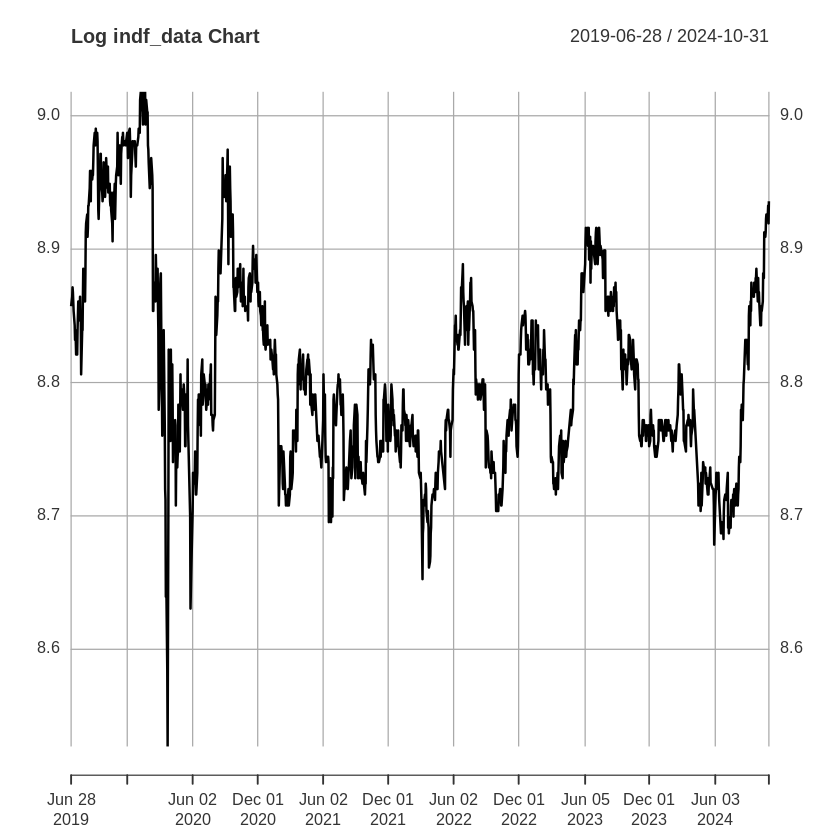

In [36]:
#log return
indf_log<-log(indf_data)
head(indf_log,n=10)
plot(indf_log,main="Log indf_data Chart")

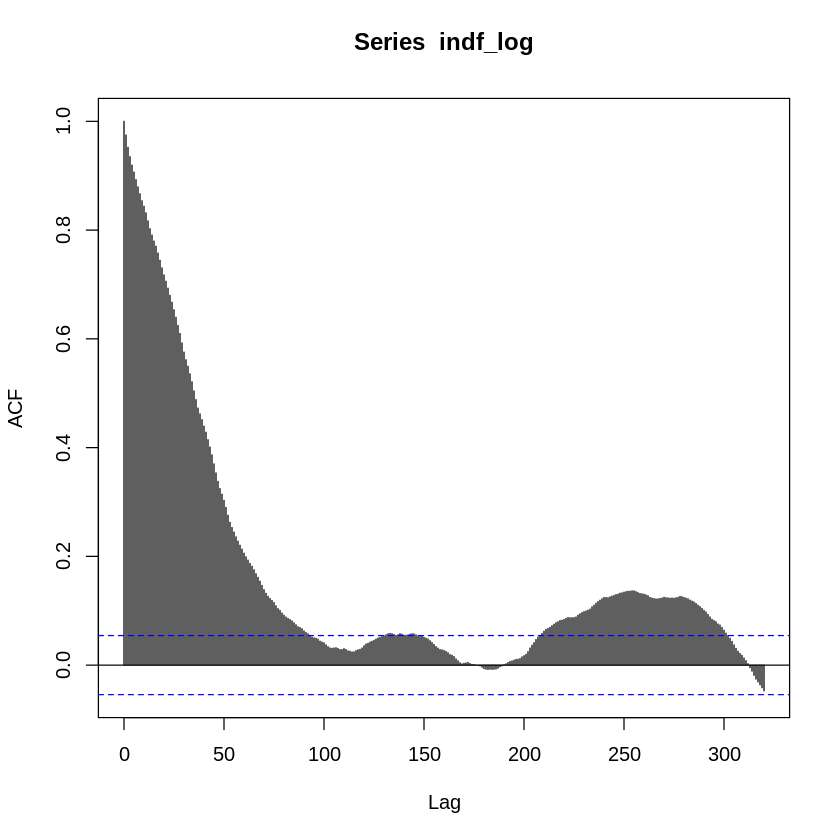

In [37]:
acf_log<-acf(indf_log,lag.max=320)

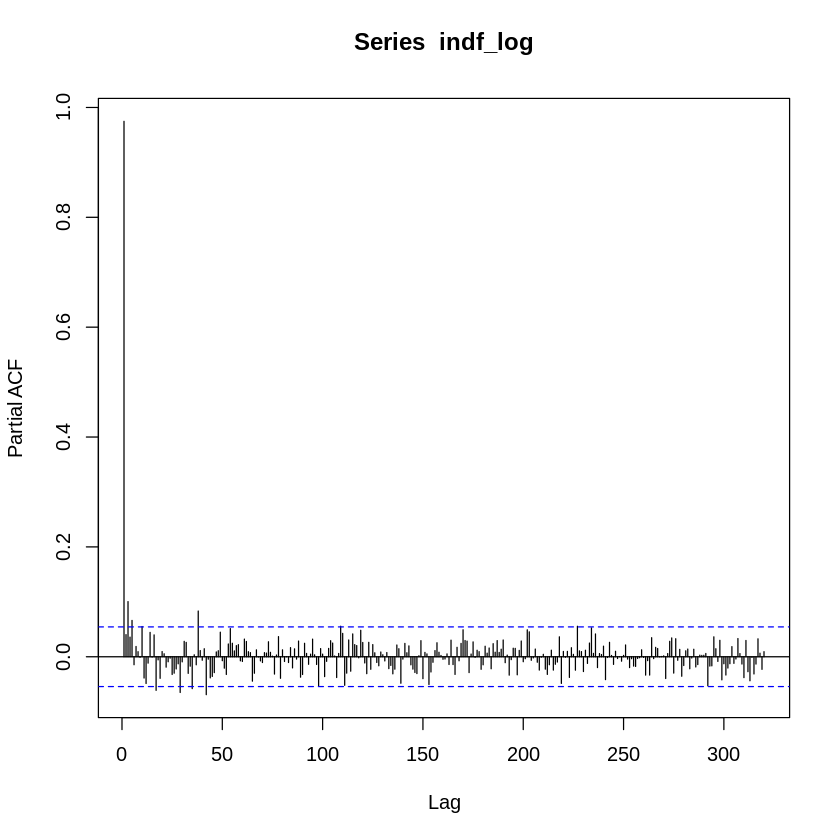

In [38]:
pacf_log<-pacf(indf_log,lag.max=320)

1. ACF menggambarkan korelasi antara nilai data pada waktu tertentu dengan nilai pada beberapa waktu sebelumnya (lag). Pada grafik ACF ini, terdapat batang yang berada di atas garis batas signifikan (garis biru putus-putus) hingga lag tertentu, menunjukkan adanya korelasi yang signifikan untuk lag tersebut.
Jika batang-batang tersebut perlahan menurun namun tetap signifikan hingga banyak lag, ini menandakan bahwa data mungkin memiliki tren dan bersifat non-stasioner.
2. Grafik PACF menunjukkan hanya sedikit lag dengan korelasi langsung yang signifikan, yang mungkin mengindikasikan bahwa data tidak memiliki pola musiman yang jelas.

Karena model kita bersifat non-stasioner, kita perlu melakukan diferensiasi pada lag tertentu agar model menjadi stasioner. Untuk bisa menerapkan model ARIMA, data harus bersifat stasioner. Stasioner adalah properti yang sangat penting dalam melakukan peramalan pada data deret waktu, karena dapat diartikan bahwa dengan data tersebut, kita memprediksi bahwa sifat-sifat statistiknya akan tetap sama di masa depan seperti yang terjadi di masa lalu. Dengan demikian, model akan memberikan ramalan yang kuat dan tidak bias untuk periode tertentu ke depan. Oleh karena itu, data yang telah ditransformasi log akan di-difference dengan lag 1. Fakta umum dalam ekonometrika adalah bahwa model random walk (dengan atau tanpa drift) yang di-difference dengan lag 1, akan otomatis menjadi stasioner. Namun, kita akan menemui nilai yang hilang pada data yang sudah di-difference, sehingga mengganti atau mengisi nilai yang hilang (misalnya dengan nilai rata-rata atau nilai terakhir) menjadi wajib dilakukan. Di sini, saya mengisi nilai yang hilang dengan nilai dari pengamatan terakhir setelah nilai yang hilang tersebut.


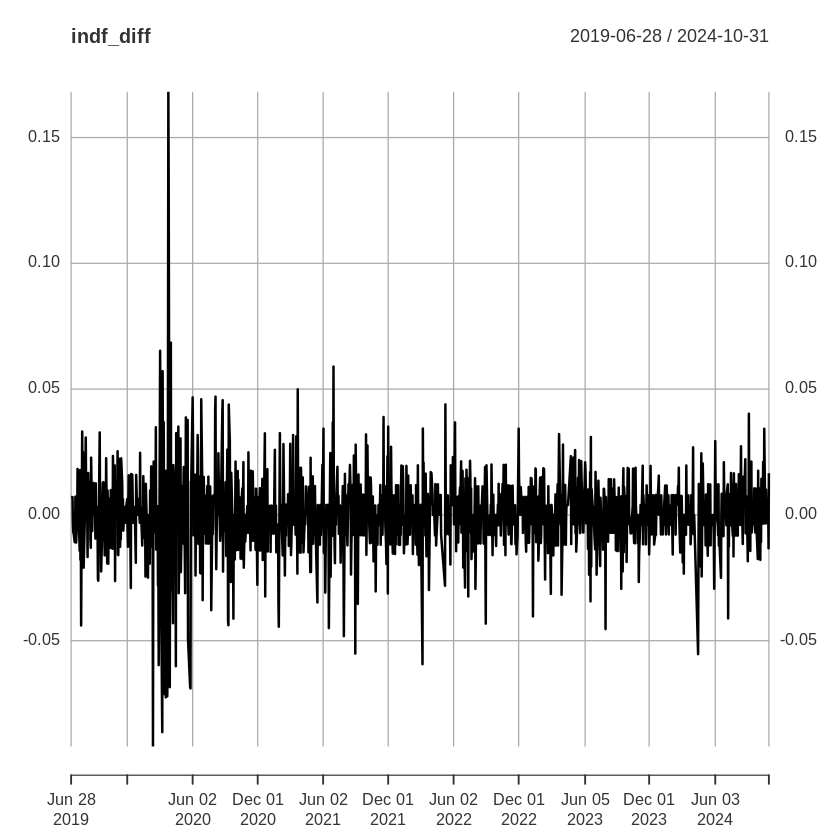

In [39]:
indf_diff <- diff(indf_log, lag = 1)
indf_diff <- na.locf(indf_diff, na.rm = TRUE,
                     fromLast = TRUE)
plot(indf_diff)

Augmented Dickey-Fuller Test :
Setelah data yang di-log di-difference pada lag 1, kita dapat melihat bahwa data tersebut sekarang berosilasi di sekitar rata-rata 0, yang merupakan karakteristik utama dari data stasioner. Namun, kita dapat melakukan pengujian tambahan untuk stasioneritas menggunakan uji akar unit. Untuk indf_log (sebelum di-difference), data tersebut mengikuti proses random walk, sehingga bersifat non-stasioner dan harus di-difference.

 Kita bisa mengujinya menggunakan Augmented Dickey Fuller Test (ADF). Secara sederhana, kita menguji hipotesis alternatif bahwa data kita bersifat stasioner melawan hipotesis nol bahwa data tersebut non-stasioner. Seperti biasa, jika nilai p yang dihasilkan di bawah 0.05, kita menyimpulkan bahwa hasilnya signifikan dan kita dapat menolak hipotesis nol. Jika tidak, data memiliki akar unit dan bersifat non-stasioner. Dari uji ADF, data yang sudah di-log dan di-difference adalah stasioner.

 H0: Data tidak stasioner
 H1 : Data Stasioner
 pval < 0.05 (H0 ditolak)
 pval >0.05 (H0 diterima)

In [44]:
install.packages("tseries")
library(tseries)
adf_diff1 <- adf.test(indf_log, alternative = c("stationary", "explosive"),
                k = 0)
adf_diff1
adf_diff <- adf.test(indf_diff, alternative = c("stationary", "explosive"),
                k = 0)
adf_diff

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Augmented Dickey-Fuller Test

data:  indf_log
Dickey-Fuller = -3.9633, Lag order = 0, p-value = 0.01083
alternative hypothesis: stationary


Warning message in adf.test(indf_diff, alternative = c("stationary", "explosive"), :
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  indf_diff
Dickey-Fuller = -37.879, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


Kita dapat melihat untuk data log  memiliki pval =0.01983< 0.05 (harusnya sudah stasioner krn menolak H0), dan data diff log nya memiliki pval=0.01 < 0.05(harusnya sdh stasioner). Pada kesempatan ini, kita gunakan data yg sdh didiferencing sekali.


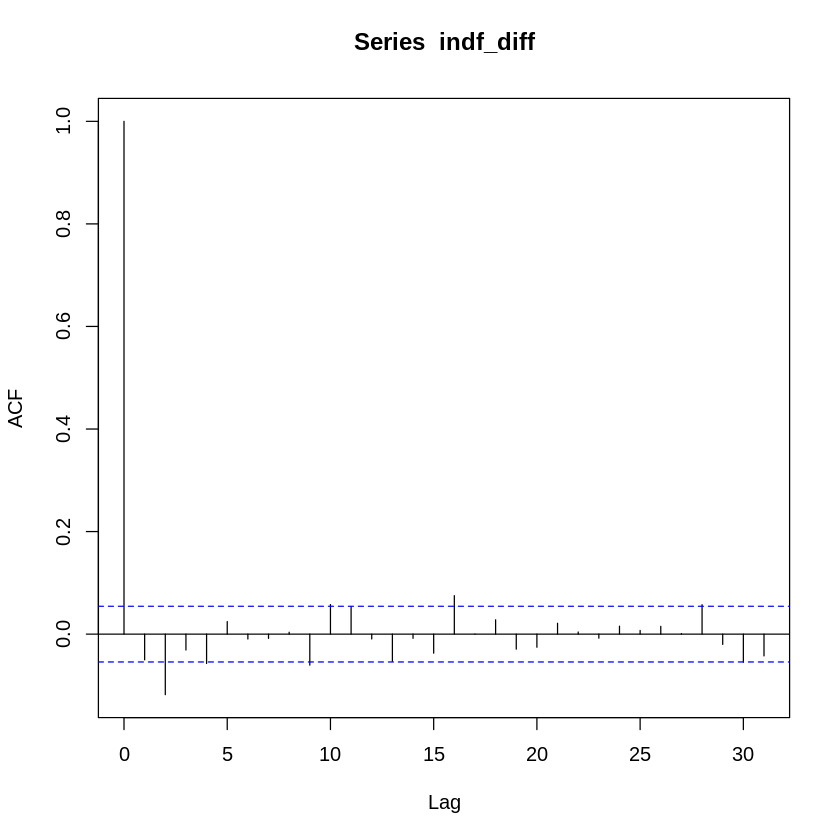

In [41]:
diff.acf <- acf(indf_diff)

Indikator :  Grafik ACF menunjukkan korelasi antar-observasi dalam data pada berbagai lag. Untuk data yang sudah di-differencing, ACF digunakan untuk melihat apakah ada pola yang berulang secara periodik. Jika ACF menurun secara cepat (decay), maka ini bisa menandakan bahwa data mungkin cukup stasioner. Namun, jika ACF menurun secara perlahan atau menunjukkan pola sinusoidal, mungkin masih ada unsur non-stasioneritas dalam data.

Dalam grafik tampak kurva ACF menurun dengan sangat cepat untuk semua lag


ACF (Partial Autocorrelation Function): PACF digunakan untuk mengidentifikasi lag-lag signifikan dalam model ARIMA. Setelah diferencing, PACF akan menunjukkan lag di mana ada korelasi signifikan yang tidak dijelaskan oleh lag sebelumnya. Jika PACF memiliki cutoff yang jelas pada lag tertentu, ini biasanya menunjukkan bahwa model AR (Autoregressive) pada lag tersebut bisa menjadi kandidat model yang baik.

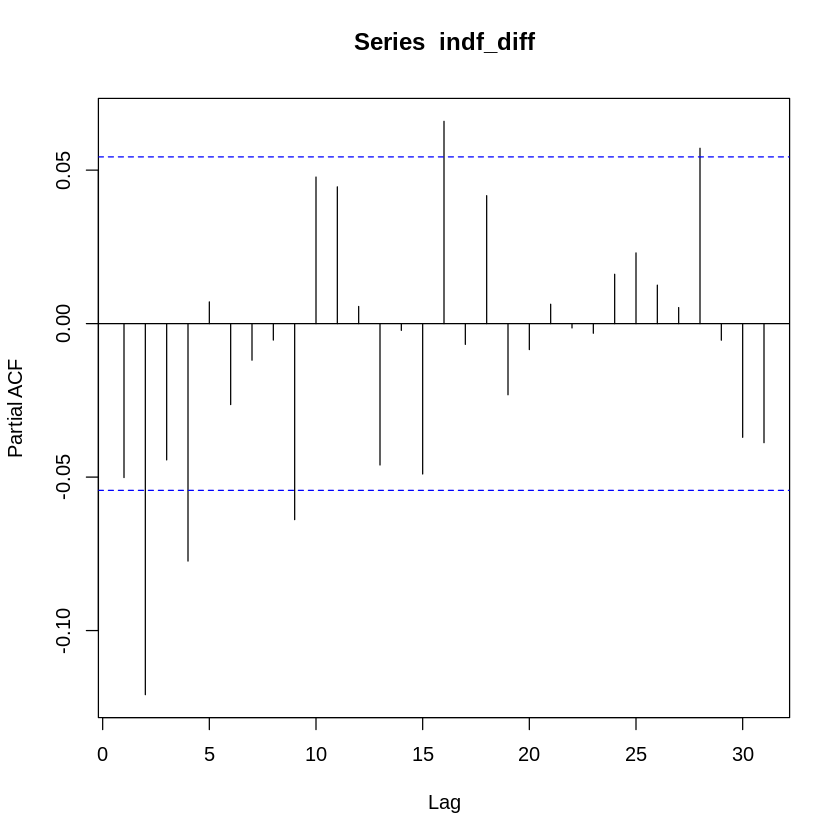

In [42]:
diff.pacf <- pacf(indf_diff)

Tampak dalam kurva ACF dan PACF spike signifikan (menembus garis biru) ketika lag-1. Selain itu, ACF menunjukkan cutoff (lag terakhir yang menembus garis biru) pada lag 2 dan pola gelombang teredam mengindikasikan data mengikuti Autoregressive(p) model. . Disisi lain, Kurva PACF  menunjukkan penurunan eksponensial dari lag 4 (yg significant dibwh garis biru) and menurun menuju 0 kemudian ber naik-turun, mengindikasikan data kita sesuai dgn MA(q) process. Secara keseluruhan, kita dapat melihat bahwa data kita mungkin cocok dengan model ARMA(p, d, q) mengingat fakta bahwa data ini memiliki karakteristik ACF dan PACF dari model AR(p) dan MA(q), dengan lag (d) sebesar 1. Namun, untuk mencari model terbaik dalam ARIMA memerlukan pemahaman yang baik tentang data dan pengalaman dari peramal. Seperti yang dikatakan oleh Damodaran Gujarati dalam bukunya, pemodelan ARIMA lebih mirip dengan seni, dan sebenarnya merupakan proses iteratif.

Oleh karena itu,digunakan function AutoARIMA untuk mendapatkan model ARIMA terbaik. Pertama, dilakukan splitting data training dan testing. Misal 1270 data training dan sisanya adalah testing.


In [47]:
install.packages("caTools")
library(caTools)
train_data <- indf_diff[1:1270]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Selanjutnya, autoarima function

In [49]:
install.packages("forecast")
library(forecast)
set.seed(123)
arima_model <- auto.arima(train_data, stationary = TRUE, ic = c("aicc", "aic", "bic"),
                          trace = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’





 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -6729.627
 ARIMA(0,0,0) with non-zero mean : -6707.28
 ARIMA(1,0,0) with non-zero mean : -6707.245
 ARIMA(0,0,1) with non-zero mean : -6709.011
 ARIMA(0,0,0) with zero mean     : -6709.286
 ARIMA(1,0,2) with non-zero mean : -6731.602
 ARIMA(0,0,2) with non-zero mean : -6730.503
 ARIMA(1,0,1) with non-zero mean : -6726.532
 ARIMA(1,0,3) with non-zero mean : -6729.785
 ARIMA(0,0,3) with non-zero mean : -6730.377
 ARIMA(2,0,1) with non-zero mean : -6730.211
 ARIMA(2,0,3) with non-zero mean : -6727.749
 ARIMA(1,0,2) with zero mean     : -6733.618
 ARIMA(0,0,2) with zero mean     : -6732.514
 ARIMA(1,0,1) with zero mean     : -6728.545
 ARIMA(2,0,2) with zero mean     : -6731.643
 ARIMA(1,0,3) with zero mean     : -6731.805
 ARIMA(0,0,1) with zero mean     : -6711.019
 ARIMA(0,0,3) with zero mean     : -6732.392
 ARIMA(2,0,1) with zero mean     : -6732.227
 ARIMA(2,0,3) with zero mean     : -6729

In [50]:
summary(arima_model)

Series: train_data 
ARIMA(1,0,2) with zero mean 

Coefficients:
         ar1      ma1      ma2
      0.4049  -0.4687  -0.1069
s.e.  0.1614   0.1622   0.0383

sigma^2 = 0.0002903:  log likelihood = 3371.16
AIC=-6734.32   AICc=-6734.29   BIC=-6713.74

Training set error measures:
                     ME       RMSE        MAE MPE MAPE      MASE          ACF1
Training set 1.6792e-05 0.01701907 0.01162523 NaN  Inf 0.6616085 -0.0006453619

Sehingga model arima yang cocok adalah, $ARIMA(1,0,2)$ dengan model sebagai berikut ⁉
$$Y^{*}_{t}=X_t = \alpha_{1} X_{t-1} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \varepsilon_t$$

